In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg
/kaggle/input/satellite-image-classification/data/green_area/Forest_2838.jpg
/kaggle/input/satellite-image-classification/data/water/SeaLake_926.jpg


In [2]:
os.listdir('/kaggle/input/satellite-image-classification/data/')

['cloudy', 'desert', 'green_area', 'water']

In [3]:
print(len(os.listdir('../input/satellite-image-classification/data/cloudy/')))
print(len(os.listdir('../input/satellite-image-classification/data/desert/')))
print(len(os.listdir('../input/satellite-image-classification/data/green_area/')))
print(len(os.listdir('../input/satellite-image-classification/data/water/')))

1500
1131
1500
1500


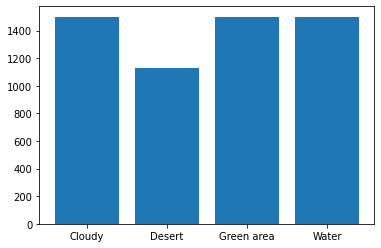

In [4]:
import matplotlib.pyplot as plt
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.bar(x,y);

In [5]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import load_img, ImageDataGenerator as IDG
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

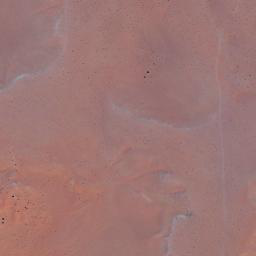

In [6]:
import cv2
load_img('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')

In [7]:
import tensorflow 
from keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator as IDG, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn
import torch
from IPython import display 
%config InlineBackend.figure_formats = ['svg']

In [8]:
image = []
label = []
img_width = 64
img_height = 64

for i in os.listdir('../input/satellite-image-classification/data/'):
    for j in os.listdir('../input/satellite-image-classification/data/'+i):
        img = cv2.imread('../input/satellite-image-classification/data/'+i+'/'+j)
        img = cv2.resize(img, (img_height,img_width))
        label.append(i)
        image.append(img)
        
        
        
x = np.array(image)
y = np.array(label)

In [9]:
le = LabelEncoder()

y = le.fit_transform(y)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30,stratify=y)
x_train = x_train/255
x_test = x_test/255

In [11]:
train_datagen = IDG(
                   fill_mode='nearest',
                   featurewise_center=True,
                   validation_split=0.2,
                   horizontal_flip=True,
                   vertical_flip= True, 
                   shear_range=0.2,
                   zoom_range=0.2,
                   brightness_range=(0.4,0.6),
                   rotation_range=10,
                   featurewise_std_normalization=True,
                   )
train_datagen.fit(x_train)

In [12]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custom_relu(x):
    return 1/(K.sigmoid(x)*2)-1

model= keras.Sequential()

model.add(Conv2D(32, (3, 3),activation=custom_relu,input_shape=(64,64,3),name='block1_cov1'))
model.add(Conv2D(32, (3, 3), activation=custom_relu,name='block1_cov2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_pool'))

model.add(Conv2D(64, (3, 3), activation=custom_relu,name='block2_cov1'))
model.add(Conv2D(64, (3, 3), activation=custom_relu,name='block2_cov2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_pool'))

model.add(Conv2D(128, (3, 3), activation=custom_relu,name='block3_cov1'))
model.add(Conv2D(128, (3, 3), activation=custom_relu,name='block3_cov2'))
model.add(Conv2D(128, (3, 3), activation=custom_relu,name='block3_cov3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block3_pool'))

model.add(GlobalAveragePooling2D(name='global_average_pooling2d'))
model.add(Dense(128, activation = 'relu',name='dense1'))
model.add(Dense(4, activation='softmax',name='dense2'))

model.summary()

2022-12-09 22:55:31.875796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 22:55:31.876913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 22:55:31.878006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 22:55:31.878792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 22:55:31.879582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_cov1 (Conv2D)         (None, 62, 62, 32)        896       
_________________________________________________________________
block1_cov2 (Conv2D)         (None, 60, 60, 32)        9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 32)        0         
_________________________________________________________________
block2_cov1 (Conv2D)         (None, 28, 28, 64)        18496     
_________________________________________________________________
block2_cov2 (Conv2D)         (None, 26, 26, 64)        36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 13, 13, 64)        0         
_________________________________________________________________
block3_cov1 (Conv2D)         (None, 11, 11, 128)       7

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True)
FIT =model.fit(x_train,y_train,
    validation_data = (x_test,y_test), 
    epochs=100,
    callbacks = [early],
    verbose = 1,
    shuffle=True,           
    steps_per_epoch=6)

2022-12-09 22:55:43.121318: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-09 22:55:45.932812: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6/6 [==============================] - 21s 1s/step - loss: 1.3414 - accuracy: 0.2382 - val_loss: 1.2340 - val_accuracy: 0.2014
Epoch 2/100
6/6 [==============================] - 2s 332ms/step - loss: 1.1366 - accuracy: 0.3970 - val_loss: 1.0995 - val_accuracy: 0.3665
Epoch 3/100
6/6 [==============================] - 2s 317ms/step - loss: 0.9314 - accuracy: 0.4745 - val_loss: 0.7948 - val_accuracy: 0.5288
Epoch 4/100
6/6 [==============================] - 2s 316ms/step - loss: 0.7832 - accuracy: 0.5064 - val_loss: 0.7306 - val_accuracy: 0.4614
Epoch 5/100
6/6 [==============================] - 2s 317ms/step - loss: 0.6919 - accuracy: 0.6268 - val_loss: 0.5957 - val_accuracy: 0.6185
Epoch 6/100
6/6 [==============================] - 2s 333ms/step - loss: 0.6051 - accuracy: 0.6459 - val_loss: 0.4885 - val_accuracy: 0.6983
Epoch 7/100
6/6 [==============================] - 2s 318ms/step - loss: 0.7028 - accuracy: 0.6485 - val_loss: 0.7446 - val_accuracy: 0.6362
Epoch 8/100
6/6 [==========

In [15]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 8ms/step - loss: 0.2250 - accuracy: 0.9219


[0.2250489890575409, 0.9219166040420532]

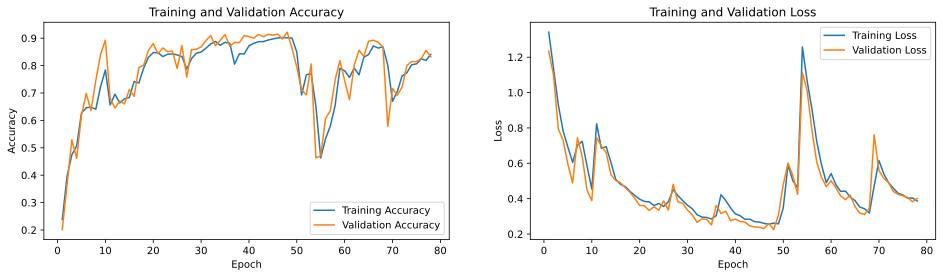

In [16]:
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
y_pred = model.predict(x_test)
y_pred = np.argmax (y_pred, axis = 1)

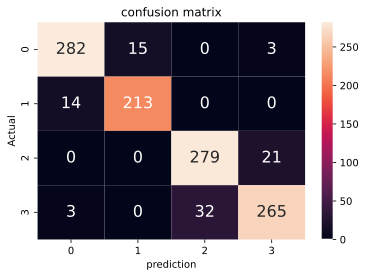

In [18]:
cm  = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       299
           1       0.94      0.93      0.94       228
           2       0.93      0.90      0.91       311
           3       0.88      0.92      0.90       289

    accuracy                           0.92      1127
   macro avg       0.92      0.92      0.92      1127
weighted avg       0.92      0.92      0.92      1127

